In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
date = '070822_coupled'
root = '/project2/gardel/steven/arrays/'

curr_date = '072022'
save_pannels = True

In [3]:
control_branch = '_2_state_step_motor_controls_'

velocity = np.loadtxt(root + date + control_branch + 'velocity.txt')
vel_err = np.loadtxt(root + date + control_branch + 'vel_err.txt')
run_len = np.loadtxt(root + date + control_branch + 'run_len.txt')
run_err = np.loadtxt(root + date + control_branch + 'run_err.txt')
atps = np.loadtxt(root + date + control_branch + 'atps.txt')
nhds = np.loadtxt(root + date + control_branch + 'nhds.txt')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


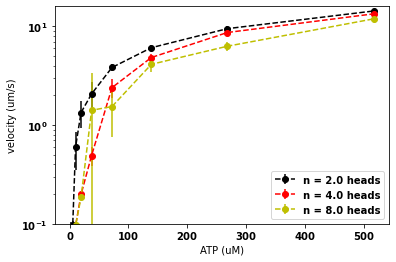

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


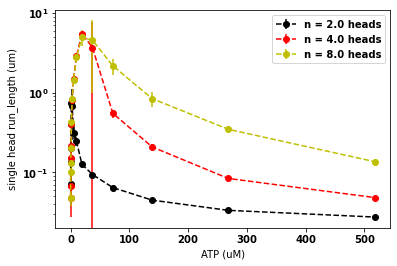

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


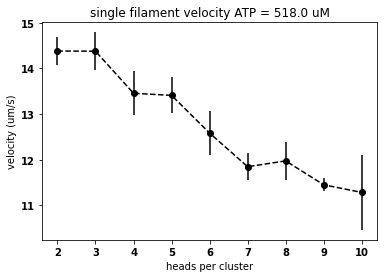

In [4]:
slc = 0
slc2 = 2
slc3 = 6

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)


atps = atps[:-1]
velocity = velocity[:-1,:]
vel_err = vel_err[:-1,:]
run_len = run_len[:-1,:]
run_err = run_err[:-1,:]


plt.errorbar(atps, velocity[:,slc], vel_err[:,slc], fmt = 'k--o', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps, velocity[:,slc2], vel_err[:,slc2], fmt = 'r--o',label = 'n = %s heads' %nhds[slc2])
plt.errorbar(atps, velocity[:,slc3], vel_err[:,slc3], fmt = 'y--o',label = 'n = %s heads' %nhds[slc3])
plt.xlabel('ATP (uM)')
plt.ylabel('velocity (um/s)')
plt.gca().set_yscale('log')
plt.ylim([0.1,16])
#plt.gca().set_xscale('log')
#plt.title('single filament velocity n = %s heads' %nhds[slc])
plt.legend()
if save_pannels:
    plt.savefig('/home/redford/Downloads/s_fil_vel_' + curr_date + '.eps')
plt.show()


#plt.errorbar(atps, run_len[:,slc], run_err[:,slc], fmt = 'k--o')
plt.errorbar(atps, run_len[:,slc], run_err[:,slc], fmt = 'k--o', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps, run_len[:,slc2], run_err[:,slc2], fmt = 'r--o',label = 'n = %s heads' %nhds[slc2])
plt.errorbar(atps, run_len[:,slc3], run_err[:,slc3], fmt = 'y--o',label = 'n = %s heads' %nhds[slc3])
plt.xlabel('ATP (uM)')
plt.ylabel('single head run_length (um)')
plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
plt.legend()
#plt.title('single filament run length n = %s heads' %nhds[slc])
if save_pannels:
    plt.savefig('/home/redford/Downloads/s_fil_rlen_' + curr_date + '.eps')
plt.show()


slc4 = 13

plt.errorbar(nhds[:], velocity[slc4,:], vel_err[slc4,:], fmt = 'k--o')
plt.xlabel('heads per cluster')
plt.ylabel('velocity (um/s)')
#plt.gca().set_xscale('log')
plt.title('single filament velocity ATP = %s uM' %np.around(atps[slc4],0))
if save_pannels:
    plt.savefig('/home/redford/Downloads/s_fil_vel_scaling_' + curr_date + '.eps')
plt.show()

In [5]:
branch = '_2_state_step_motor_run_'

displacement = np.loadtxt(root + date + branch + 'displacement.txt')
disp_err = np.loadtxt(root + date + branch + 'disp_err.txt')
xlk = np.loadtxt(root + date + branch + 'xlk.txt')
xlk_err = np.loadtxt(root + date + branch + 'xlk_err.txt')
atps = np.loadtxt(root + date + branch + 'atps.txt')
nhds = np.loadtxt(root + date + branch + 'nhds.txt')

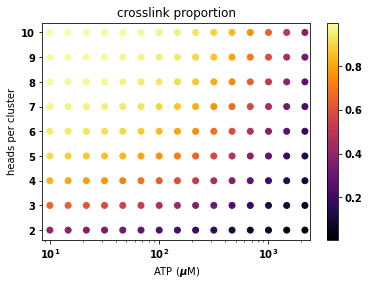

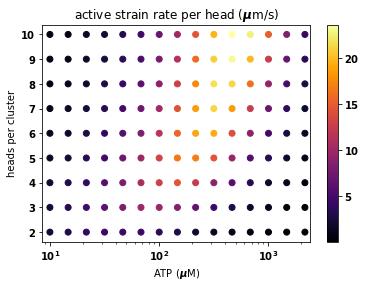

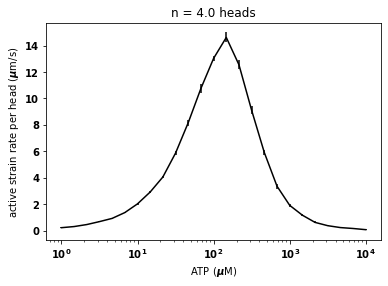

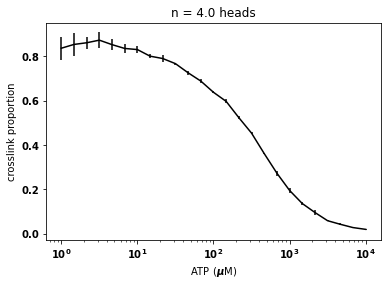

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


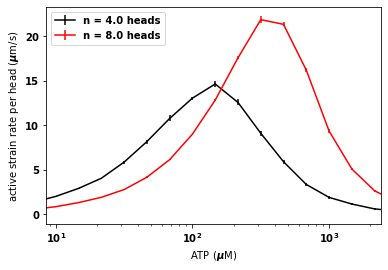

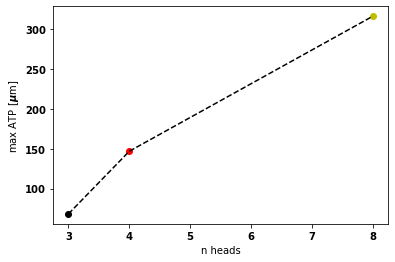

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


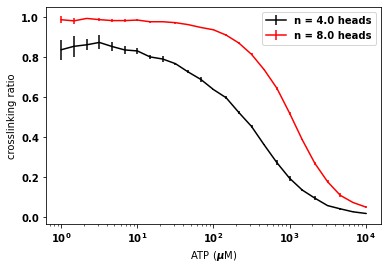

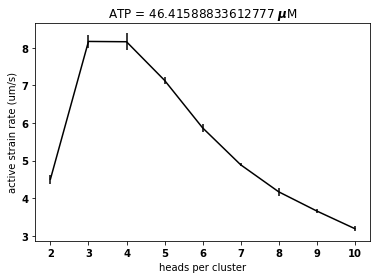

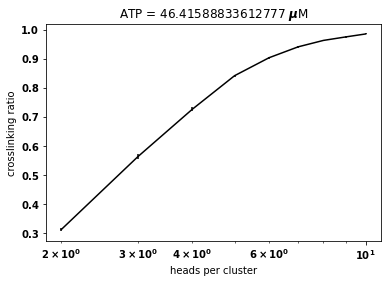

In [6]:
#xlking phase space
space1, space2 = np.meshgrid(atps,nhds)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),c = xlk.transpose().flatten(),cmap = 'inferno')
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('heads per cluster')
plt.title('crosslink proportion')
plt.xlim([8.5,2400])
if save_pannels:
    plt.savefig('/home/redford/Downloads/xlk_phase_space_' + curr_date + '.eps')
plt.show()

#displacement phase space
space1, space2 = np.meshgrid(atps,nhds)
#print(np.shape(space1),np.shape(xlk))
plt.scatter(space1.flatten(),space2.flatten(),c = displacement.transpose().flatten()/space2.flatten(),cmap = 'inferno')#,\
            #norm=col.LogNorm(),)
plt.gca().set_xscale('log')
plt.colorbar()
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('heads per cluster')
plt.title('active strain rate per head ($\mu$m/s)')
#plt.axis('equal')
#plt.axis('off')
plt.xlim([8.5,2400])
if save_pannels:
    plt.savefig('/home/redford/Downloads/disp_phase_space_' + curr_date + '.eps')
plt.show()

#single slice in ATP disp
slc = 2
slc2 = 6
plt.errorbar(atps,displacement[:,slc]/nhds[slc],disp_err[:,slc]/nhds[slc], fmt = 'k')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('active strain rate per head ($\mu$m/s)')
plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_disp_' + curr_date + '.eps')
plt.show()

#single slice in ATP xlk
slc = 2
slc2 = 6
slc3 = 1
plt.errorbar(atps,xlk[:,slc],xlk_err[:,slc], fmt = 'k')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('crosslink proportion')
plt.title('n = %s heads' %nhds[slc])
#plt.xlim([8.5,2400])
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_xlk_' + curr_date + '.eps')
plt.show()



plt.errorbar(atps,displacement[:,slc]/nhds[slc],disp_err[:,slc]/nhds[slc], fmt = 'k', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps,displacement[:,slc2]/nhds[slc2],disp_err[:,slc2]/nhds[slc2], fmt = 'r', label = 'n = %s heads' %nhds[slc2])
#plt.errorbar(atps,displacement[:,slc3]/np.amax(displacement[:,slc3]),disp_err[:,slc3]/np.amax(displacement[:,slc3]), fmt = 'k', label = 'n = %s heads' %nhds[slc3])
plt.gca().set_xscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('active strain rate per head ($\mu$m/s)')
plt.legend()
plt.xlim([8.5,2400])#plt.title('n = %s heads' %nhds[2])
#plt.gca().set_yscale('log')
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_oct_disp_' + curr_date + '.eps')
plt.show()


pltx = [nhds[slc3],nhds[slc],nhds[slc2]]
plty = [atps[displacement[:,slc3] == np.amax(displacement[:,slc3])],\
        atps[displacement[:,slc] == np.amax(displacement[:,slc])],\
       atps[displacement[:,slc2] == np.amax(displacement[:,slc2])]]

plt.scatter(nhds[slc],atps[displacement[:,slc] == np.amax(displacement[:,slc])], c = 'r')
plt.scatter(nhds[slc2],atps[displacement[:,slc2] == np.amax(displacement[:,slc2])], c = 'y')
plt.scatter(nhds[slc3],atps[displacement[:,slc3] == np.amax(displacement[:,slc3])], c = 'k')
plt.plot(pltx,plty,'k--')
plt.xlabel('n heads')
plt.ylabel('max ATP [$\mu$m]')
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
if save_pannels:
    plt.savefig('/home/redford/Downloads/max_ATP_' + curr_date + '.eps')
plt.show()


plt.errorbar(atps,xlk[:,slc],xlk_err[:,slc], fmt = 'k', label = 'n = %s heads' %nhds[slc])
plt.errorbar(atps,xlk[:,slc2],xlk_err[:,slc2], fmt = 'r', label = 'n = %s heads' %nhds[slc2])
plt.gca().set_xscale('log')
plt.xlabel('ATP ($\mu$M)')
plt.ylabel('crosslinking ratio')
plt.legend()
#plt.title('n = %s heads' %nhds[2])
if save_pannels:
    plt.savefig('/home/redford/Downloads/tet_oct_xlk_' + curr_date + '.eps')
plt.show()

#single slice in cluster_size
slc = 10
plt.errorbar(nhds,displacement[slc,:]/nhds,disp_err[slc,:]/nhds, fmt = 'k')
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('heads per cluster')
plt.ylabel('active strain rate (um/s)')
plt.title('ATP = %s $\mu$M' %atps[slc])
plt.show()

#single slice in cluster_size xlking
slc = 10
plt.errorbar(nhds,xlk[slc,:],xlk_err[slc,:], fmt = 'k')
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.xlabel('heads per cluster')
plt.ylabel('crosslinking ratio')
plt.title('ATP = %s $\mu$M' %atps[slc])
plt.show()


In [7]:
thing = displacement[:,3]